In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de Gráfico
sns.set(style="whitegrid")

# Importando o CSV
df = pd.read_csv('dataset_vendas.csv', sep=';')

# Criar uma figura para cada gráfico
plt.figure(figsize=(15, 12))

# Corrigir datas inválidas: converter ignorando erros
df["Data_Compra"] = pd.to_datetime(df["Data_Compra"], errors="coerce")

# Remover linhas com datas inválidas
df = df.dropna(subset=["Data_Compra"])

<Figure size 1500x1200 with 0 Axes>

Text(0, 0.5, 'Frequência')

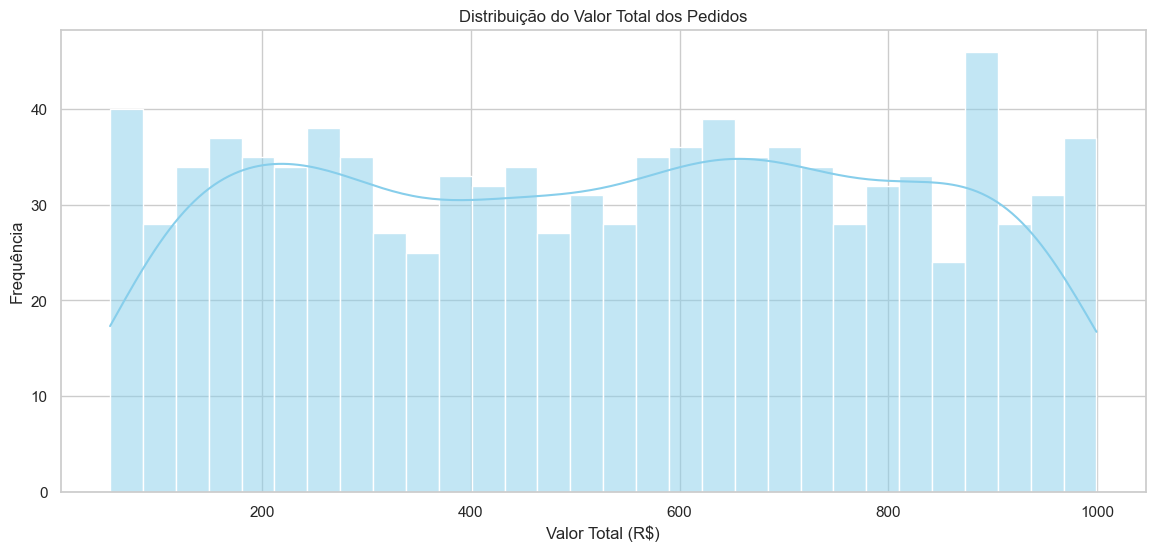

In [38]:
# 1. Histograma de Valor_Total
plt.figure(figsize=(14, 6))
sns.histplot(df["Valor_Total"], bins=30, kde=True, color='skyblue')
plt.title("Distribuição do Valor Total dos Pedidos")
plt.xlabel("Valor Total (R$)")
plt.ylabel("Frequência")

Text(0.5, 0, 'Valor Total (R$)')

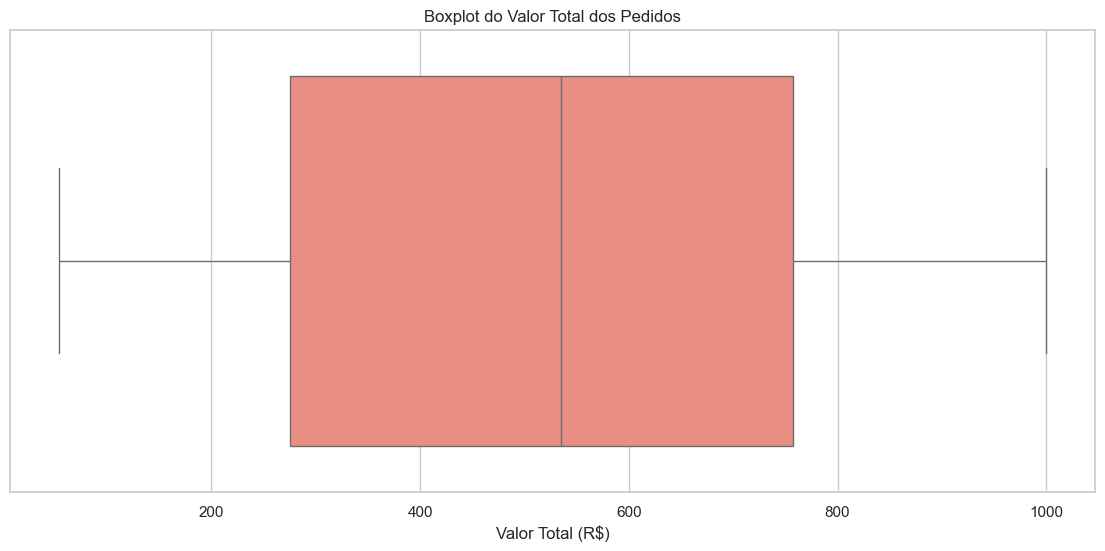

In [37]:
# 2. Boxplot de Valor_Total
plt.figure(figsize=(14, 6))
sns.boxplot(x=df["Valor_Total"], color='salmon')
plt.title("Boxplot do Valor Total dos Pedidos")
plt.xlabel("Valor Total (R$)")

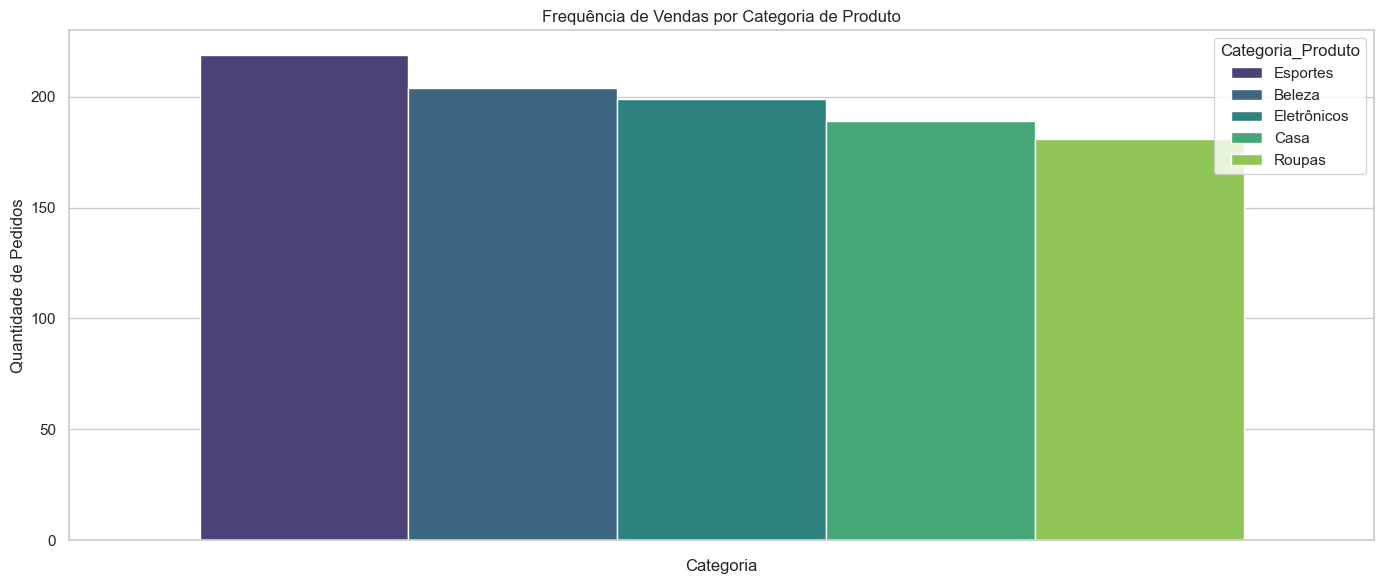

In [36]:
# 3. Gráfico de barras - Frequência de Categoria_Produto
plt.figure(figsize=(14, 6))
categoria_counts = df["Categoria_Produto"].value_counts()
sns.barplot(hue=categoria_counts.index, y=categoria_counts.values, palette="viridis")
plt.title("Frequência de Vendas por Categoria de Produto")
plt.xlabel("Categoria")
plt.ylabel("Quantidade de Pedidos")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [22]:
# Agrupamentos
media_valor_por_categoria = df.groupby("Categoria_Produto")["Valor_Total"].mean().sort_values()
soma_por_dia = df.groupby("Data_Compra")["Valor_Total"].sum()

Text(0, 0.5, 'Categoria')

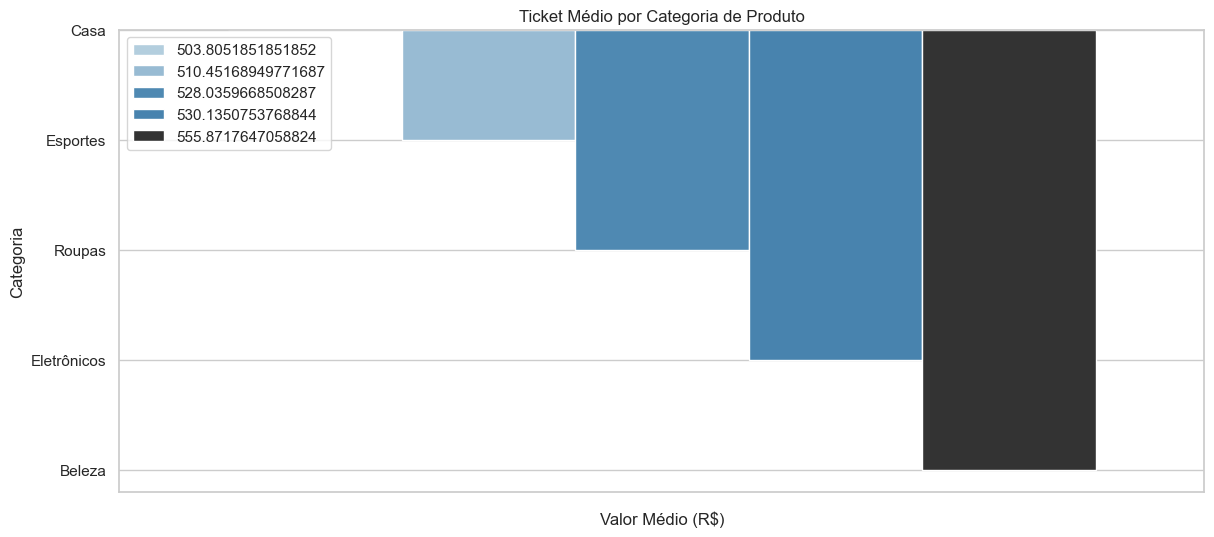

In [35]:
# 1. Gráfico de barras: Média de Valor_Total por Categoria_Produto
plt.figure(figsize=(14, 6))
sns.barplot(hue=media_valor_por_categoria.values, y=media_valor_por_categoria.index, palette="Blues_d")
plt.title("Ticket Médio por Categoria de Produto")
plt.xlabel("Valor Médio (R$)")
plt.ylabel("Categoria")

Text(0, 0.5, 'Valor Total (R$)')

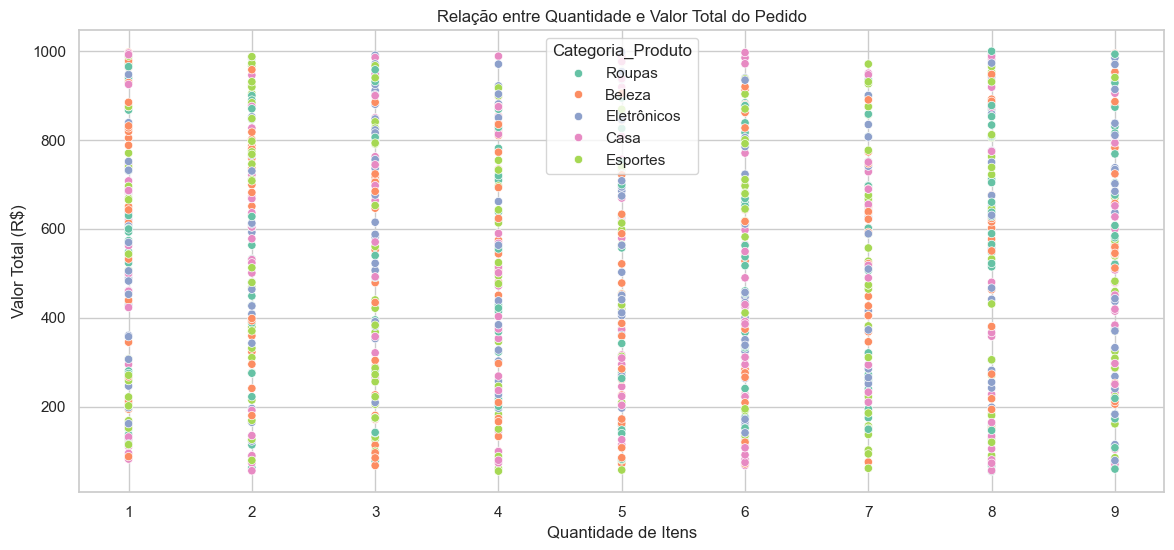

In [34]:
# 2. Gráfico de dispersão entre Quantidade e Valor_Total
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x="Quantidade", y="Valor_Total", hue="Categoria_Produto", palette="Set2")
plt.title("Relação entre Quantidade e Valor Total do Pedido")
plt.xlabel("Quantidade de Itens")
plt.ylabel("Valor Total (R$)")

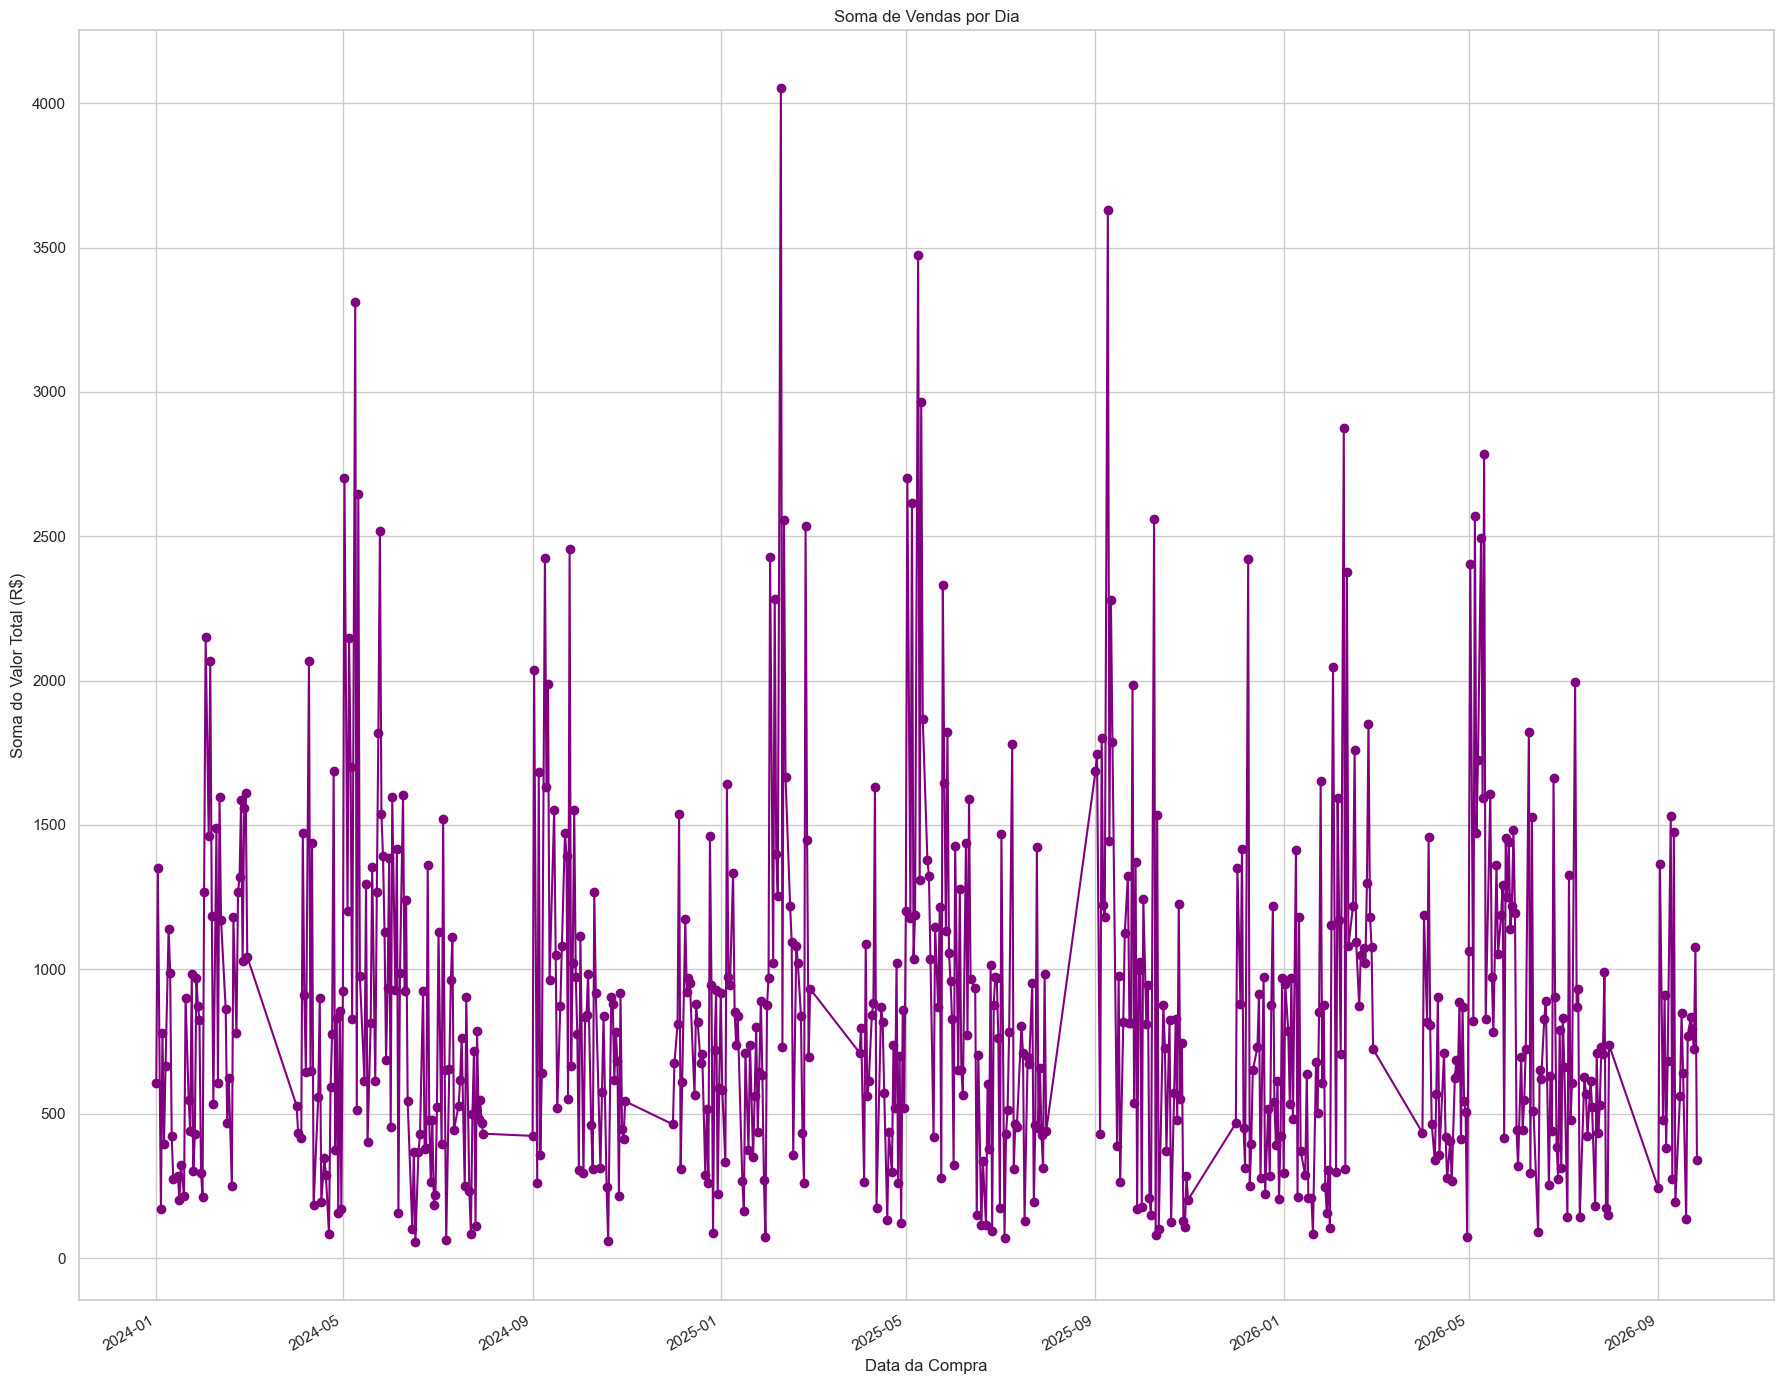

In [33]:
# 3. Gráfico de linha: Soma de Valor_Total por Data_Compra
plt.figure(figsize=(18, 14))
soma_por_dia.plot(kind='line', marker='o', color='purple')
plt.title("Soma de Vendas por Dia")
plt.xlabel("Data da Compra")
plt.ylabel("Soma do Valor Total (R$)")
plt.grid(True)

plt.tight_layout()
plt.show()

In [41]:
# Gráfico de barras empilhadas: Quantidade por Categoria_Produto ao longo do tempo (por mês)
df['Mes'] = df['Data_Compra'].dt.to_period('M').astype(str)
quantidade_categoria_mes = df.groupby(['Mes', 'Categoria_Produto'])['Quantidade'].sum().unstack().fillna(0)
# Heatmap de correlação entre variáveis numéricas
correlation_matrix = df[['Valor_Total', 'Quantidade']].corr()

<Figure size 1800x1600 with 0 Axes>

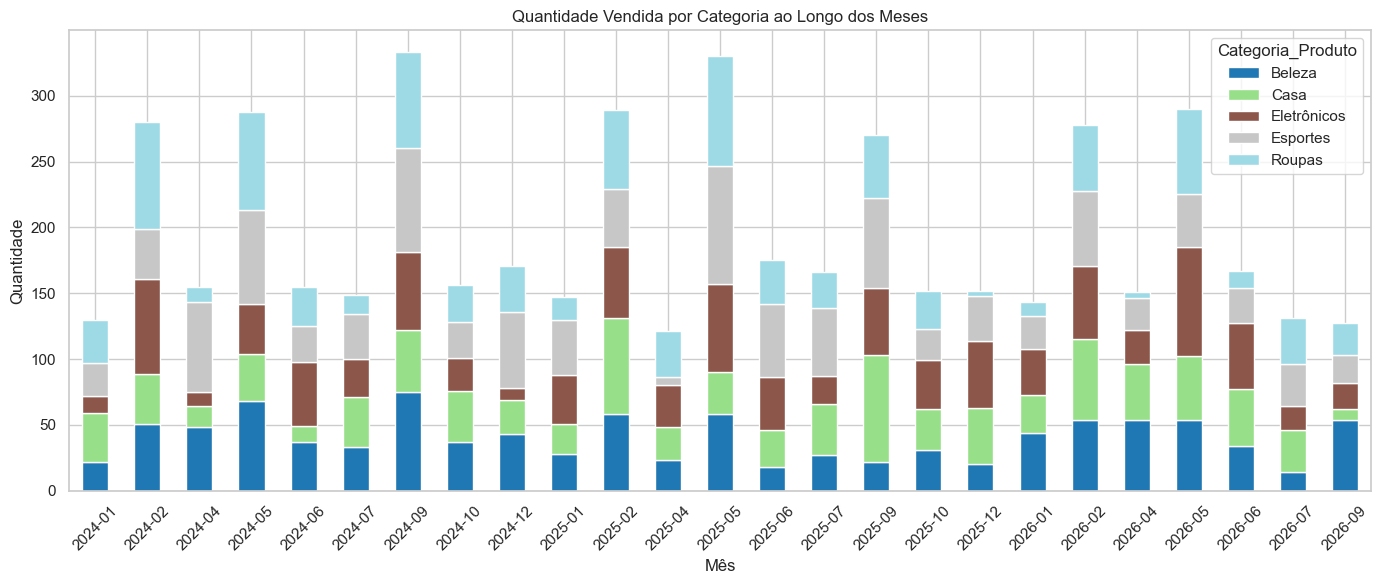

In [45]:
# Gráfico 1: Barras empilhadas
plt.figure(figsize=(18, 16))
quantidade_categoria_mes.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 6))
plt.title("Quantidade Vendida por Categoria ao Longo dos Meses")
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.tight_layout()

Text(0.5, 1.0, 'Mapa de Correlação entre Variáveis Numéricas')

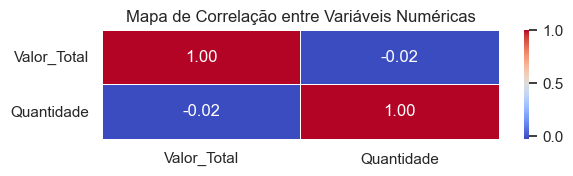

In [46]:
# Gráfico 2: Heatmap de correlação
plt.subplot(3, 1, 2)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlação entre Variáveis Numéricas")

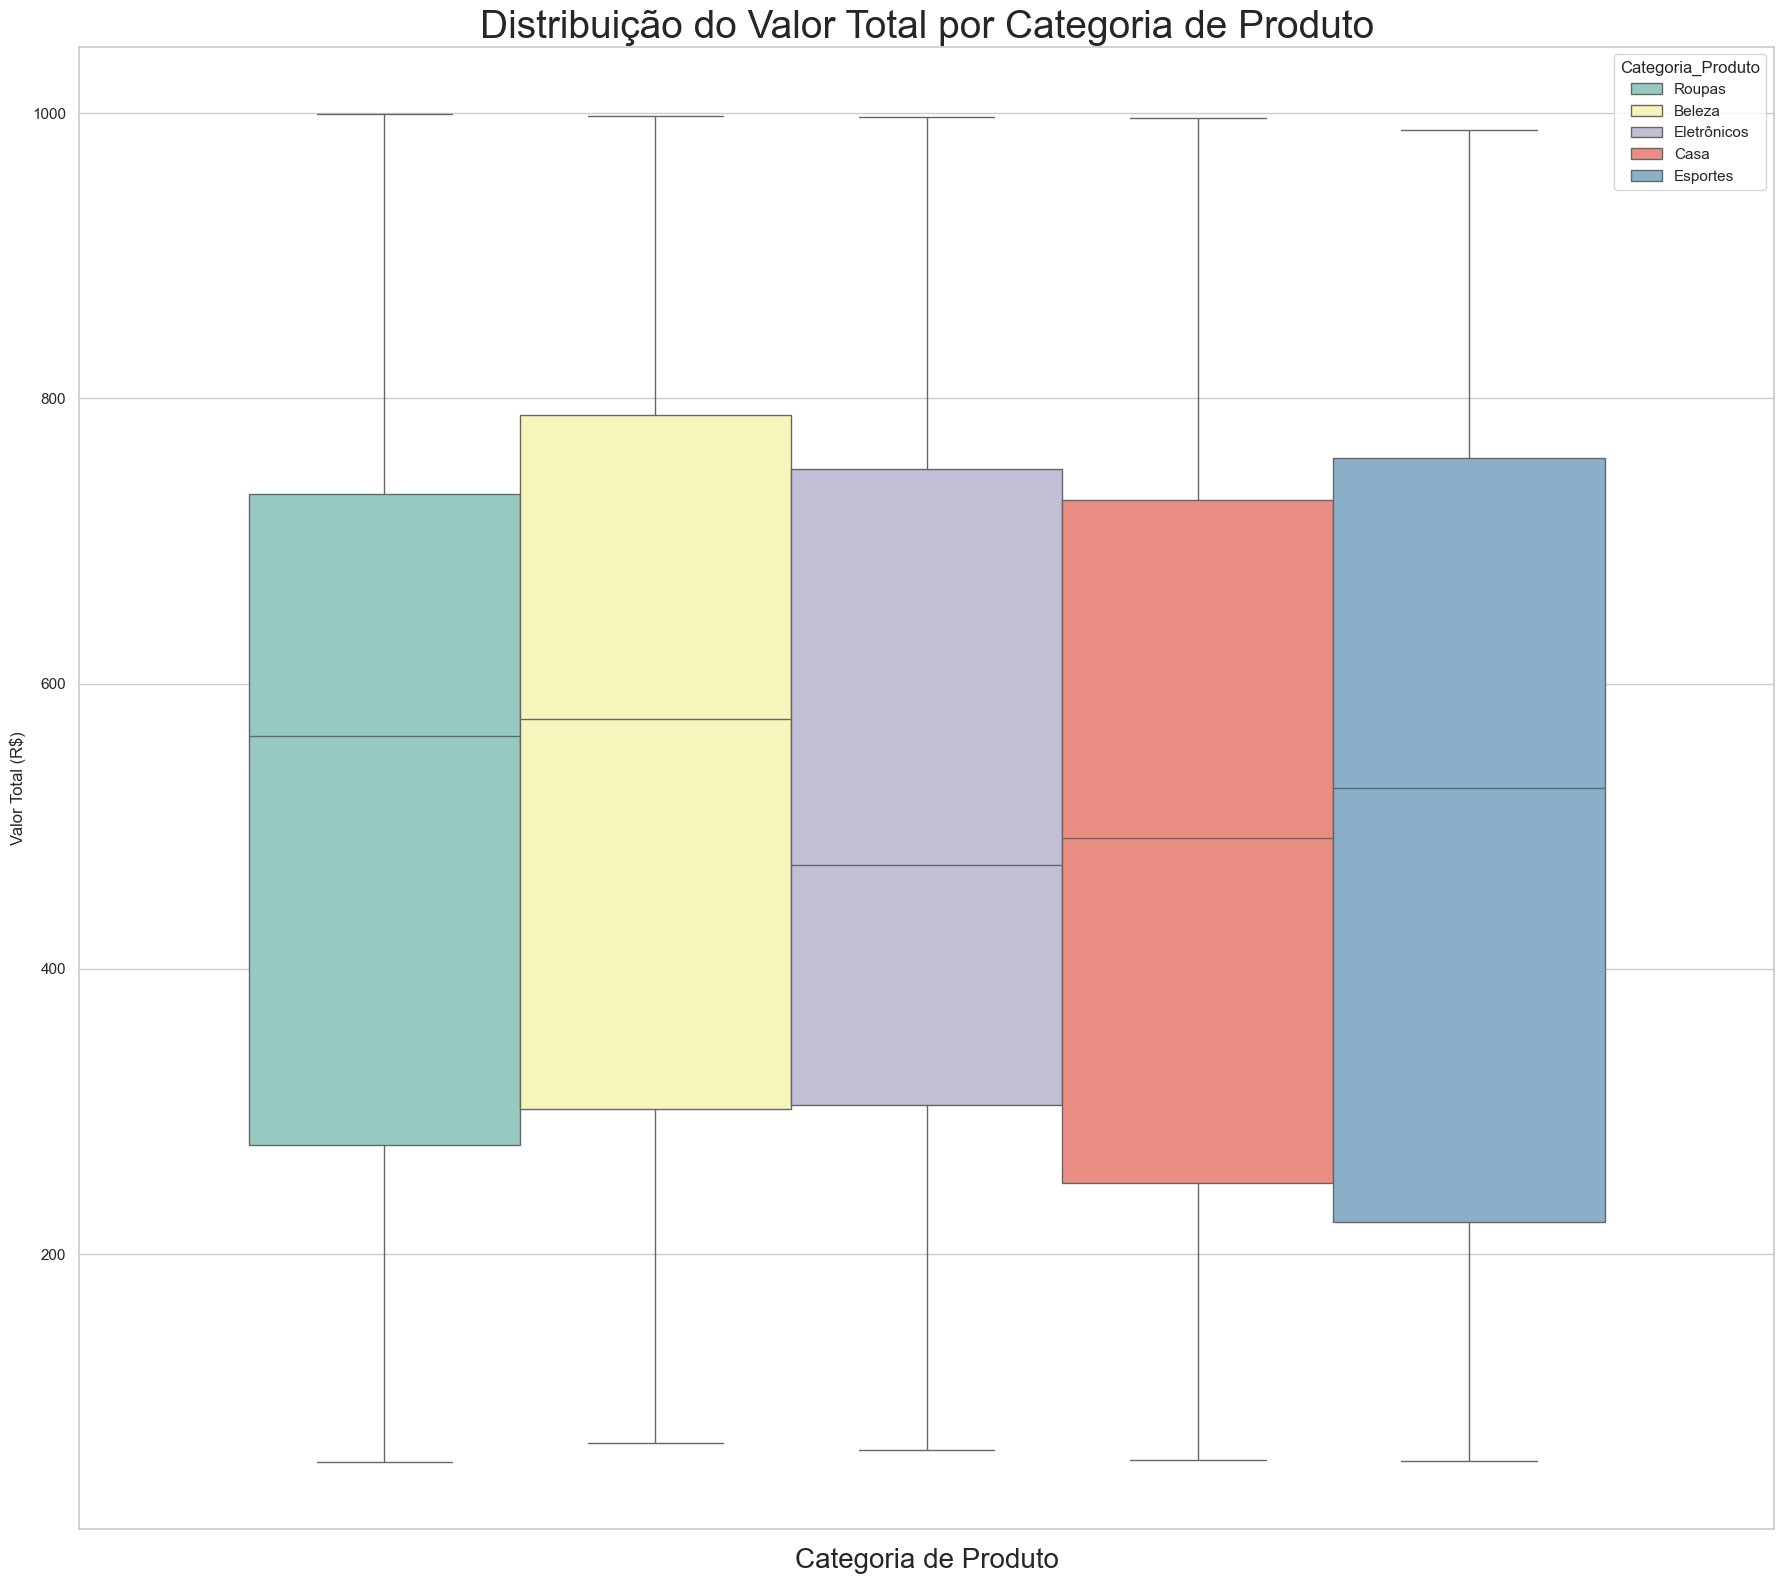

In [61]:
# Gráfico 3: Boxplot de Valor_Total por Categoria
plt.figure(figsize=(18, 16))
sns.boxplot(data=df, hue="Categoria_Produto", y="Valor_Total", palette="Set3")
plt.title("Distribuição do Valor Total por Categoria de Produto", fontsize=28)
plt.xlabel("Categoria de Produto", fontsize=20)
plt.ylabel("Valor Total (R$)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()